___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
pd.set_option('display.float_format', lambda x: "%.3f" % x)
np.set_printoptions(suppress=True)

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print('No. of training images is', X_train.shape[0], 'with a resolution of ' , X_train.shape[1], 'x', X_train.shape[1])
print('No. of testing images is', X_test.shape[0], 'with a resolution of ' , X_test.shape[1], 'x', X_test.shape[1])
print('No. of classes is', len(np.unique(y_test)))

No. of training images is 60000 with a resolution of  28 x 28
No. of testing images is 10000 with a resolution of  28 x 28
No. of classes is 10


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [4]:
classes = {0: 'T-shirt/top',
           1: 'Trouser',
           2: 'Pullover',
           3: 'Dress',
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag',
           9: 'Ankle boot'}

In [5]:
y_test_classes = np.vectorize(classes.get)(y_test)
y_train_classes = np.vectorize(classes.get)(y_train)

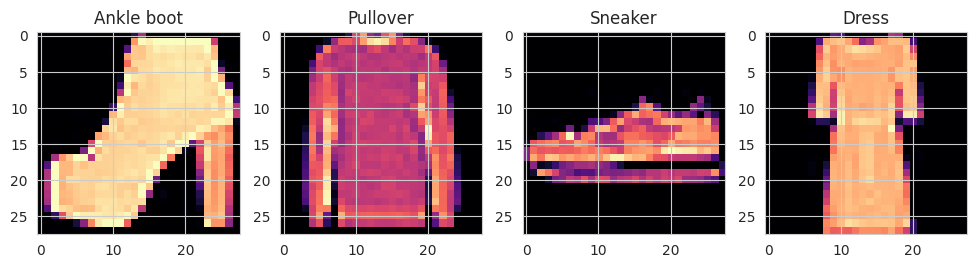

In [6]:
# display 4 picture based on index
plt.figure(figsize=(12, 3))

for i in range(44, 48):
    plt.subplot(1, 4, i-43)
    plt.imshow(X_train[i], cmap='magma') # the colors are gray but I'm using colors for clear visuals
    plt.title(y_train_classes[i]) # to print class upove each figure

plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [8]:
X_train[300].max()

255

In [9]:
# Max normalization
X_train = X_train.astype('float32') # from int to float
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [11]:
# creating validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.1,
                                                  stratify=y_train,
                                                  random_state=1010)

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [13]:
np.expand_dims(X_train, 3).shape

(54000, 28, 28, 1)

In [14]:
# reshaping X
X_train = np.expand_dims(X_train, 3)
X_val = np.expand_dims(X_val, 3)
X_test = np.expand_dims(X_test, 3)

In [15]:
X_test.shape

(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [16]:
# we have 10 classes to be encoded
y_train_enc = to_categorical(y_train, 10)
y_test_enc = to_categorical(y_test, 10)
y_val_enc = to_categorical(y_val, 10)
y_test_enc.shape

(10000, 10)

# Modeling

In [18]:
SEED = 101
import os
import random

def set_seed():
    os.environ["TF_DETERMINISTIC_OPS"] = "1"
    tf.keras.utils.set_random_seed(SEED)
    os.environ["PYTHONHASHSEED"] = str(SEED)
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)

## Create the model

**TASK 6: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

### Suggested Model

In [19]:
set_seed()

suggested_model = Sequential()

suggested_model.add(Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
suggested_model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))
suggested_model.add(Flatten())
suggested_model.add(Dense(128, activation='relu'))
suggested_model.add(Dense(10, activation='softmax'))
suggested_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [20]:
suggested_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [21]:
history = suggested_model.fit(X_train, y_train_enc, batch_size = 64, epochs = 20, validation_data=(X_val, y_val_enc))

Epoch 1/20
844/844 [==============================] - 92s 105ms/step - loss: 0.4308 - accuracy: 0.8481 - val_loss: 0.3018 - val_accuracy: 0.8905
Epoch 2/20
844/844 [==============================] - 70s 83ms/step - loss: 0.2706 - accuracy: 0.9029 - val_loss: 0.2735 - val_accuracy: 0.9027
Epoch 3/20
844/844 [==============================] - 68s 81ms/step - loss: 0.2255 - accuracy: 0.9161 - val_loss: 0.2751 - val_accuracy: 0.9040
Epoch 4/20
844/844 [==============================] - 71s 84ms/step - loss: 0.1939 - accuracy: 0.9293 - val_loss: 0.2460 - val_accuracy: 0.9158
Epoch 5/20
844/844 [==============================] - 87s 103ms/step - loss: 0.1677 - accuracy: 0.9387 - val_loss: 0.3021 - val_accuracy: 0.9007
Epoch 6/20
844/844 [==============================] - 67s 80ms/step - loss: 0.1468 - accuracy: 0.9460 - val_loss: 0.2423 - val_accuracy: 0.9148
Epoch 7/20
844/844 [==============================] - 56s 67ms/step - loss: 0.1268 - accuracy: 0.9534 - val_loss: 0.2588 - val_accurac

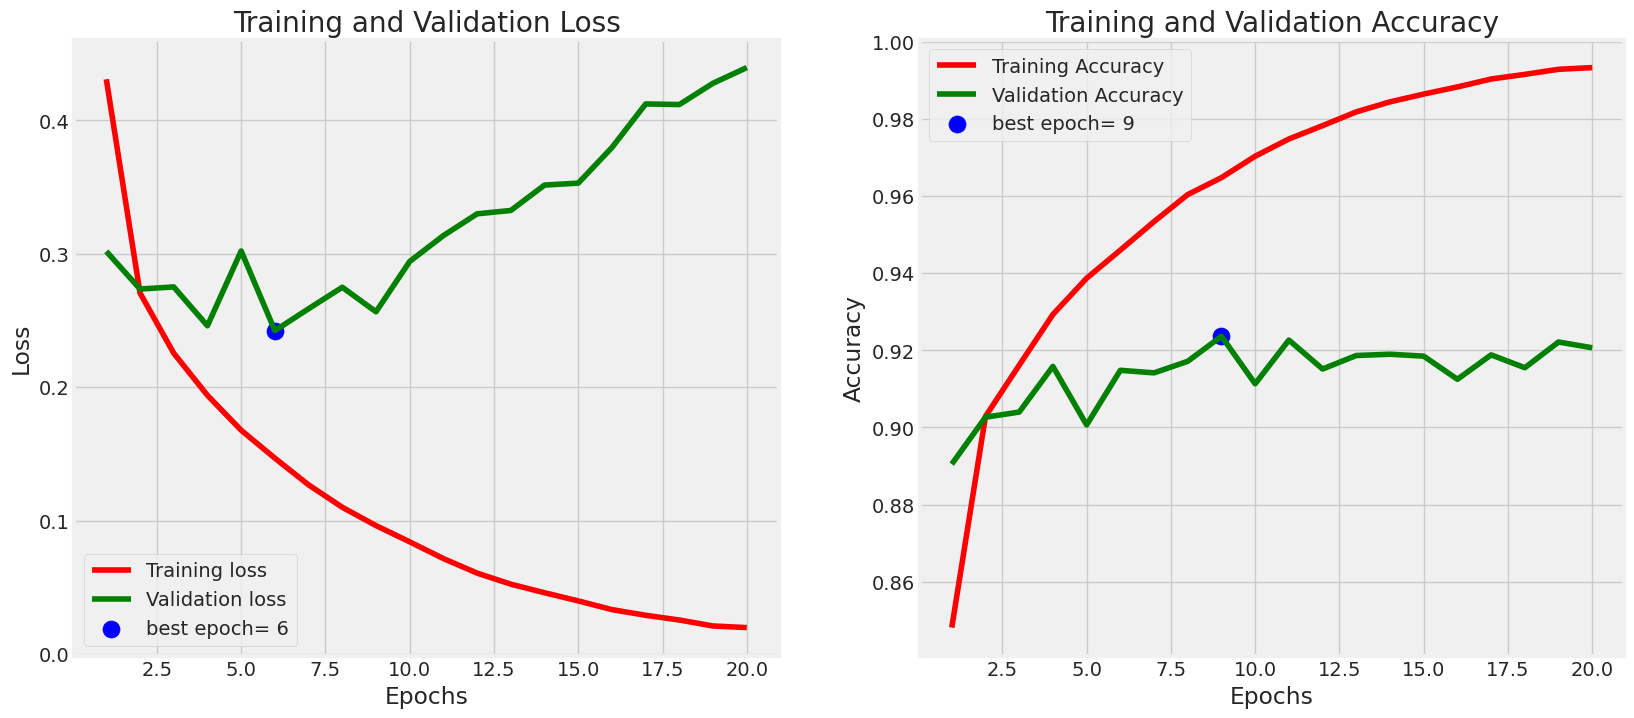

In [22]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [26]:
y_pred = suggested_model.predict(X_test, verbose=0)

In [27]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [28]:
print(classification_report(y_test, y_pred,zero_division=False))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.88      0.85      1000
           3       0.91      0.90      0.90      1000
           4       0.86      0.84      0.85      1000
           5       0.98      0.99      0.98      1000
           6       0.80      0.74      0.77      1000
           7       0.97      0.98      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [29]:
conv_mat = confusion_matrix(y_test, y_pred)

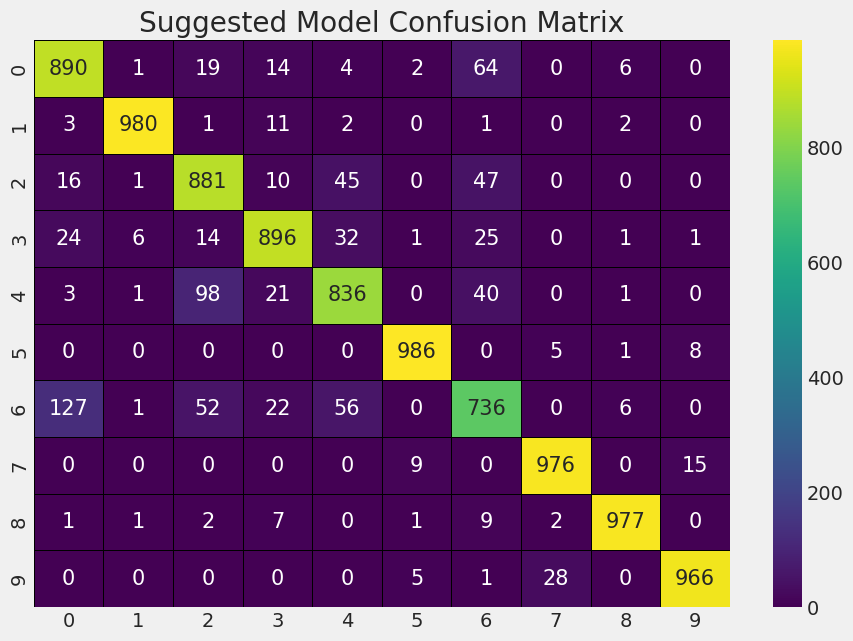

In [44]:
plt.figure(figsize=(10, 7))
sns.heatmap(
    conv_mat,
    annot=True,
    cmap='viridis',
    linewidths=0.5,
    linecolor='black',
    fmt='g',
    annot_kws={"size": 15},
)
plt.title('Suggested Model Confusion Matrix')
plt.show()

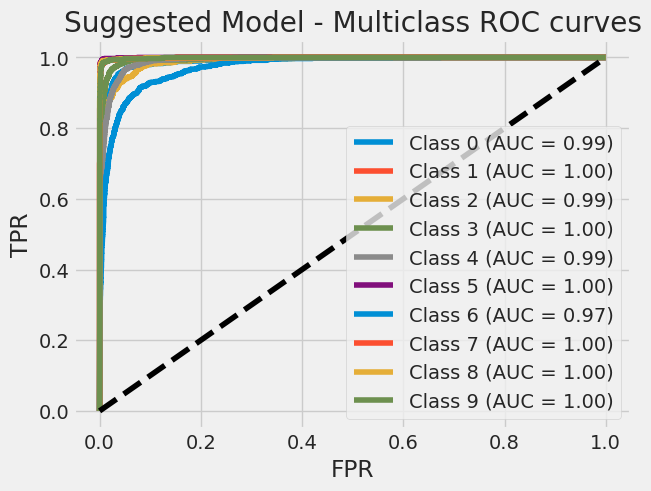

In [31]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = suggested_model.predict(X_test, verbose=0)
n = 10
fpr = dict()
tpr = dict()
roc_auc = dict()

# to calculate auc score for each class
for i in range(n):
    fpr[i], tpr[i], _ = roc_curve(y_test_enc[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Suggested Model - Multiclass ROC curves')
plt.legend(loc='lower right')
plt.show()

## Prediction

### Saving the model

In [32]:
suggested_model.save('fashion_classifier.keras')

In [33]:
model = load_model('fashion_classifier.keras')

In [34]:
item = X_test[14]
item.shape

(28, 28, 1)

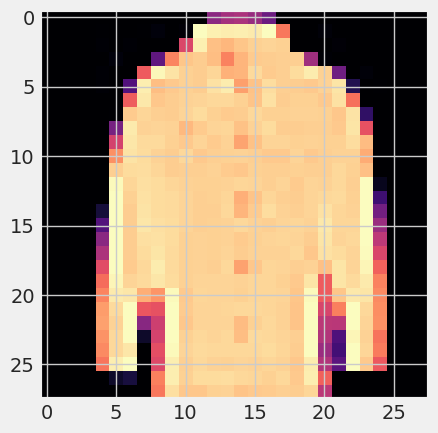

In [35]:
# sample img for prediction
plt.imshow(item, cmap='magma')
plt.show()

In [36]:
pred_prob = model.predict(np.expand_dims(item, 0))
pred_prob

1/1 [==============================] - 0s 74ms/step


array([[0.00000009, 0.        , 0.10628937, 0.        , 0.89371014,
        0.00000001, 0.00000026, 0.00000001, 0.        , 0.00000006]],
      dtype=float32)

In [37]:
y_pred = np.argmax(pred_prob)

In [38]:
print(f'The model predicted that item belongs to class {y_pred} which is {classes[y_pred]}')

The model predicted that item belongs to class 4 which is Coat


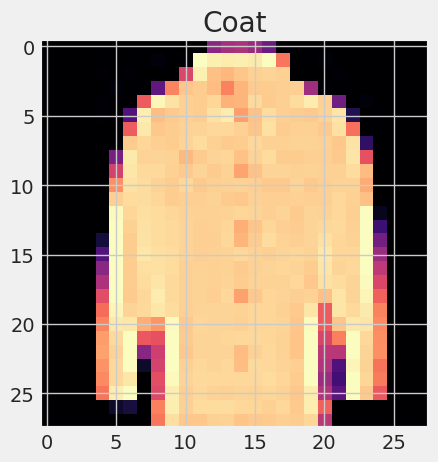

In [39]:
plt.imshow(item, cmap='magma')
plt.title(y_test_classes[14])
plt.show()

In [40]:
pred_prob = model.predict(np.expand_dims(X_test[65], 0))

1/1 [==============================] - 0s 32ms/step


In [41]:
y_pred = np.argmax(pred_prob)
print(f'The model predicted that item belongs to class {y_pred} which is {classes[y_pred]}')

The model predicted that item belongs to class 1 which is Trouser


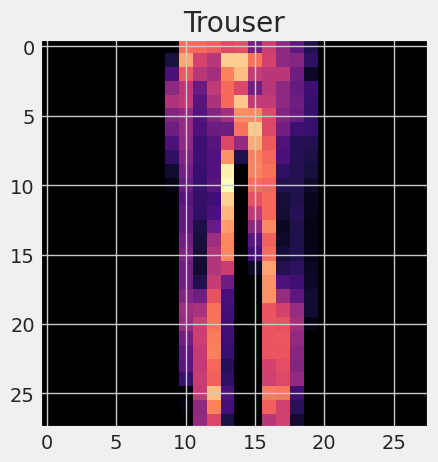

In [42]:
plt.imshow(X_test[65], cmap='magma')
plt.title(y_test_classes[65])
plt.show()

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___